In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from scipy.optimize import minimize
from datetime import datetime



In [177]:
def deriv(y, t, N, beta, gamma):
    S,I,R = y
    dSdt = -beta * S * I / N
    dIdt = (beta * I * S / N) - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

In [178]:
df_all = pd.read_csv('../cov_datasets/all.csv')
df_all['Cummulative_Infected'] = np.cumsum(df_all['Infected'])
display(df_all[501:])

,Date,Cummulative_Deaths,Infected,Cummulative_Recovered,Cummulative_Infected
501,2021-06-29,14735.0,1376.0,763569.0,795277.0
502,2021-06-30,14776.0,1810.0,765277.0,797087.0
503,2021-07-01,14797.0,1741.0,766949.0,798828.0
504,2021-07-02,14819.0,1773.0,768722.0,800601.0
505,2021-07-03,14837.0,1864.0,770414.0,802465.0
506,2021-07-04,14843.0,1479.0,771975.0,803944.0
507,2021-07-05,14857.0,1021.0,773568.0,804965.0
508,2021-07-06,14879.0,1658.0,775406.0,806623.0
509,2021-07-07,14892.0,2181.0,776910.0,808804.0
510,2021-07-08,14912.0,2239.0,778510.0,811043.0


In [179]:
np.cumsum(df_all['Infected'])

0            5.0
1            9.0
2           10.0
3           16.0
4           24.0
         ...    
550    1179548.0
551    1203457.0
552    1228601.0
553    1254459.0
554    1279920.0
Name: Infected, Length: 555, dtype: float64

In [195]:
N = 40000
beta = 1  # infected person infects 1 other person per day
D = 14.0 # infections lasts 7 days
gamma = 1.0 / D

#2021-06-29
S0, I0, R0 = N-I0-R0, 7619, 3750  # initial conditions: one infected, rest susceptible

In [196]:
S0

28631

In [203]:
t = np.linspace(0, 10) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

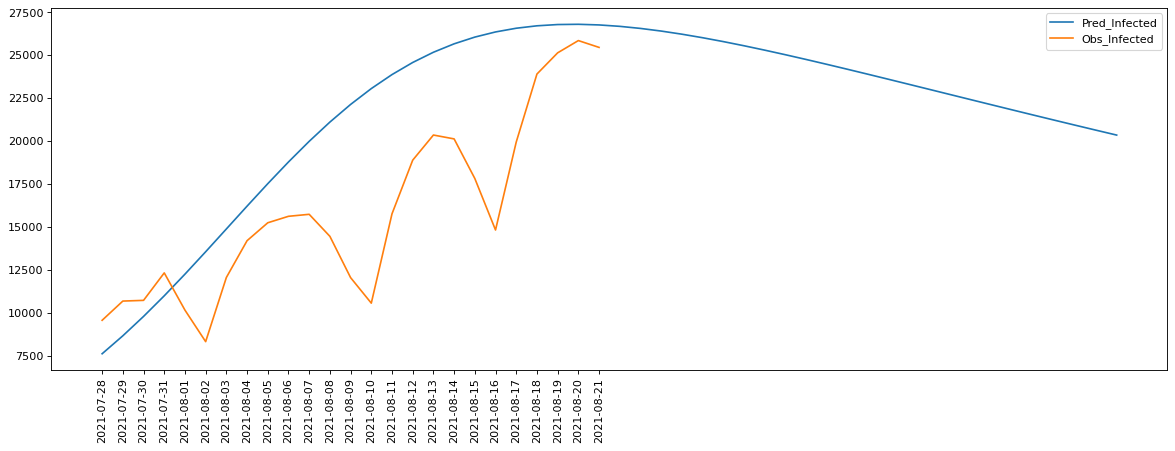

In [204]:
from matplotlib.pyplot import figure
figure(figsize=(18, 6), dpi=80)
#plt.plot(S, label='Pred_Susceptible')
plt.plot(I, label='Pred_Infected')
#plt.plot(R, label='Pred_Recovered')
plt.plot(df_all['Date'][530:],df_all['Infected'][530:],label='Obs_Infected')
plt.xticks(rotation ='vertical')


plt.legend()

In [206]:
len(I)

50

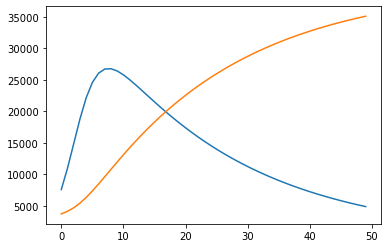

In [199]:
#plt.plot(S, label='Pred_Susceptible')
plt.plot(I, label='Pred_Infected')
plt.plot(R, label='Pred_Recovered')